In [1]:
import pandas as pd
import numpy as np

# Graphics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.dates as mdates

# rc('text', usetex=True)
# rc('text.latex', preamble=r'\usepackage{cmbright}')
# rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

# Magic function to make matplotlib inline;
%matplotlib inline

# This enables SVG graphics inline. 
# There is a bug, so uncomment if it works.
# %config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [7]:
df = pd.read_csv('../simulation_output/run2/sim5.csv')

In [8]:
df.head()

,delta,p,corr_p,t,p_t (two),p_t (one)
0,-200,0.00001,0.00001,11.154819,7.771455e-19,3.885728e-19
1,-199,0.00001,0.00001,14.356868,1.804910e-24,9.024548e-25
2,-198,0.00001,0.00001,10.700830,4.628645e-18,2.314323e-18
3,-197,0.00001,0.00001,10.691317,4.021638e-18,2.010819e-18
4,-196,0.00001,0.00001,7.191542,1.646746e-10,8.233729e-11


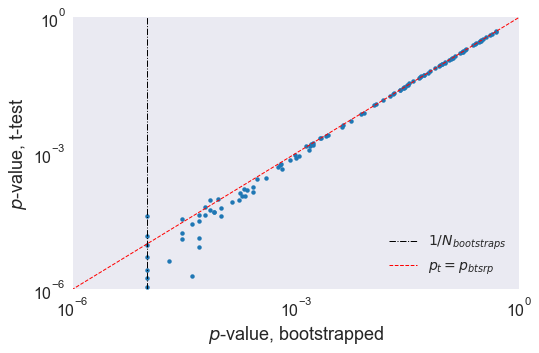

In [9]:
fig, ax = plt.subplots(figsize=(8,5))

sns.regplot(data=df, x='corr_p', y='p_t (one)', scatter_kws={'s': 20, 'alpha':1},
            line_kws={'ls':'--', 'lw':1, 'color':'red', 'label': 'best fit line'}, ax=ax, fit_reg=False)
plt.axvline(10**-5, ls='-.', color='k', lw=1, label=r'$1/N_{bootstraps}$')
plt.plot(np.linspace(10**-7, 10), np.linspace(10**-7, 10), '--', lw=1, color='red', label=r'$p_t = p_{btsrp}$')

plt.xlim(10**-6, 1)
plt.ylim(10**-6, 1)

plt.legend()

plt.xscale('log')
plt.yscale('log')

plt.xticks([0.000001, 0.001, 1])
plt.yticks([0.000001, 0.001, 1])

plt.xlabel(r'$p$-value, bootstrapped')
plt.ylabel(r'$p$-value, t-test')

plt.savefig('../simulation_output/plots/run2_sim4.svg', bbox_inches='tight')